In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Real estate.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
real_estate = pd.read_csv("/kaggle/input/dataset/Real estate.csv")
real_estate = real_estate.drop("No", axis = 1)
real_estate

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


## EDA

In [24]:
real_estate = (real_estate - real_estate.mean())/real_estate.std()

In [25]:
np.random.seed(1)
real_estate = real_estate.to_numpy()
np.random.shuffle(real_estate)
real_estate = pd.DataFrame(real_estate)
real_estate

,0,1,2,3,4,5,6
0,1.244928,-0.641876,0.925476,-0.031981,-0.762282,-1.292165,-0.784934
1,-0.233967,-1.458203,-0.705407,0.647006,-0.267528,0.490573,1.206763
2,-0.528327,-0.773542,1.580125,-1.389957,-1.159536,2.144297,-1.174454
3,-1.414955,-0.150324,2.363266,-1.389957,-2.099892,-1.950917,-1.938795
4,-1.120595,-1.554758,-0.641681,-1.050463,0.464934,-0.180560,0.545314
...,...,...,...,...,...,...,...
409,0.950568,1.210222,3.508532,-1.050463,-1.456872,-3.178504,-1.512528
410,1.539289,1.298000,-0.522412,1.325994,0.551154,0.375894,-0.123485
411,-1.709316,1.701774,-0.130932,-1.050463,0.237702,1.125217,-0.446860
412,-1.414955,-0.422433,-0.660208,0.986500,-0.239325,0.626103,0.096998


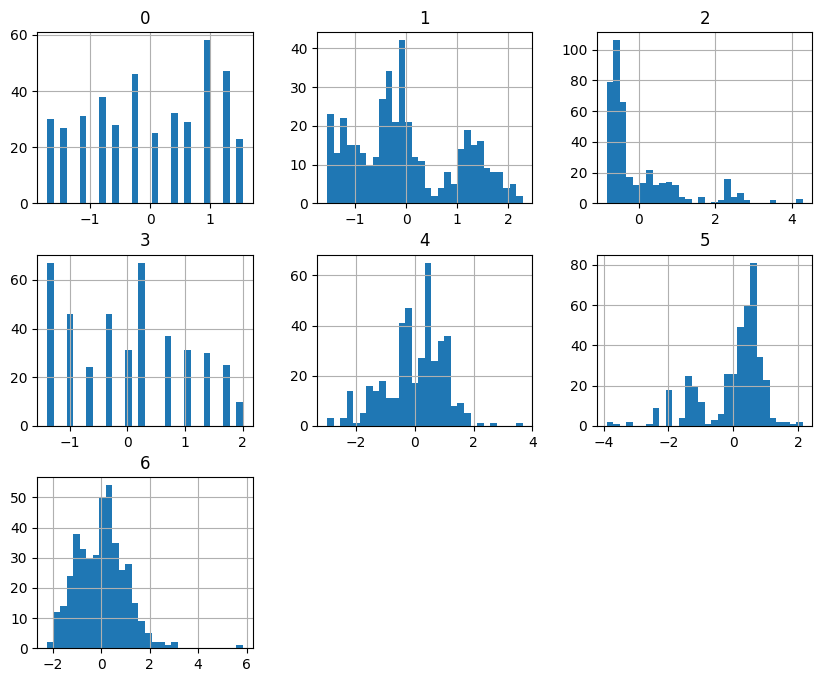

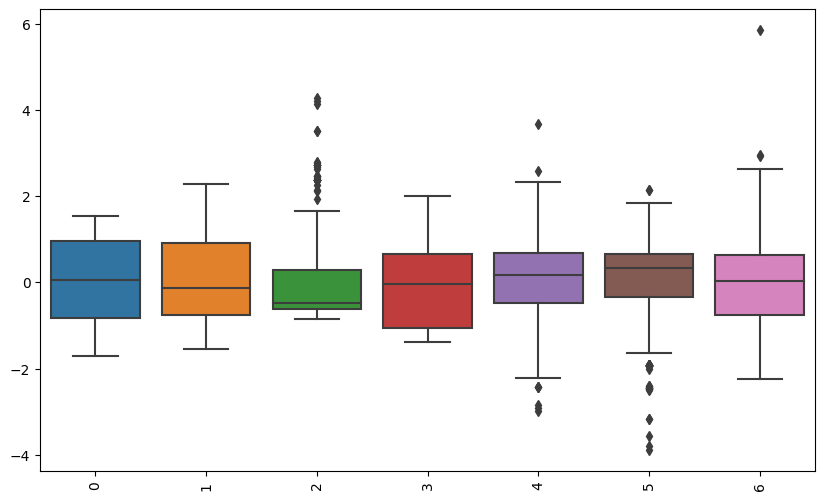

In [26]:
import seaborn as sns

real_estate.hist(bins = 30, figsize = (10, 8))
plt.show()

plt.figure(figsize = (10, 6))
sns.boxplot(data = real_estate)
plt.xticks(rotation = 90)
plt.show()

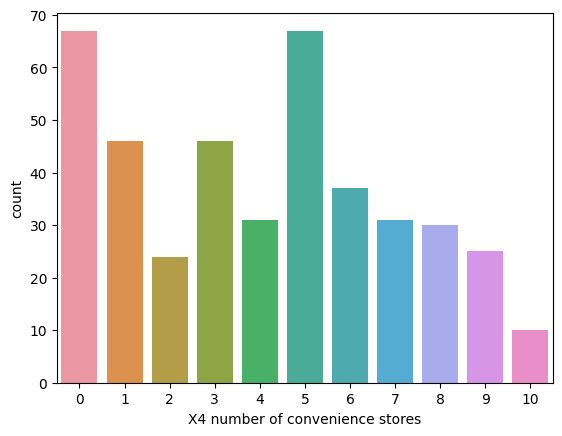

In [29]:
sns.countplot(x = 'X4 number of convenience stores', data = real_estate)
plt.show()

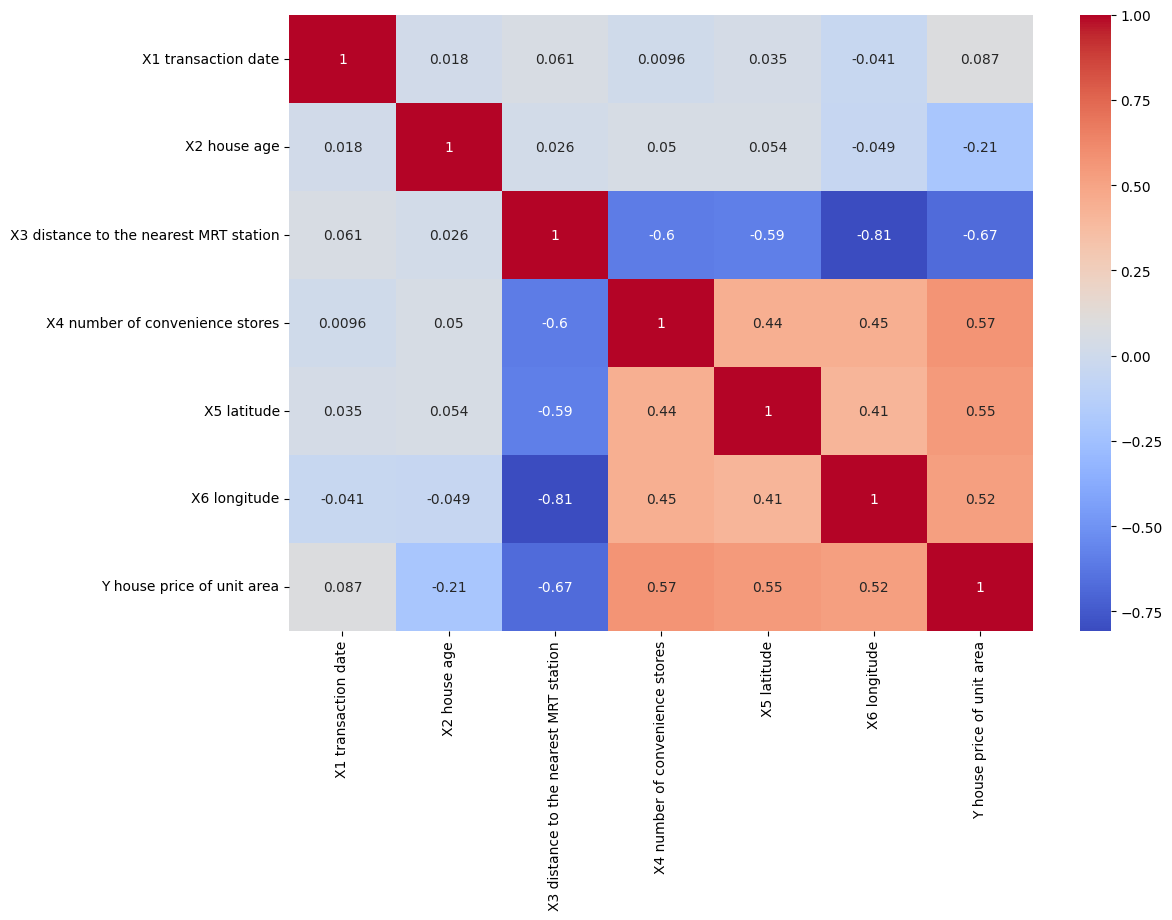

In [32]:
correlation_matrix = real_estate.corr()

plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

## Implementation of Linear Regression through Gradient Descent

In [33]:
real_estate = pd.read_csv("/kaggle/input/dataset/Real estate.csv")
real_estate = real_estate.drop("No", axis = 1)
real_estate

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [34]:
real_estate = (real_estate - real_estate.mean())/real_estate.std()

In [52]:
def predict(X_test, Y_test, weights):
    '''
    Return RMSE on testing data given weights as a parameter
    '''
    test_examples = X_test.shape[0]
    predicted = X_test @ weights
    difference = np.subtract(predicted, Y_test)
    difference_square = np.square(difference)
    mse = np.mean(difference_square)
    rmse = math.sqrt(mse)
    return rmse

def fit(X_train, Y_train, X_val, Y_val, learning_rate, max_epochs):
    training_examples, number_of_features = X_train.shape
    val_examples, number_of_features = X_val.shape
    weights = np.zeros((number_of_features, 1))
    loss = 1e10
    epochs = 0
    train_rmse = 0
    train_loss, val_loss = [], []
    
    while True:
        predicted = X_train @ weights
        difference = np.subtract(predicted, Y_train)
        difference_square = np.square(difference)
        loss = np.mean(difference_square)
        train_loss.append(loss)
        train_rmse = math.sqrt(loss)
        
        predicted_val = X_val @ weights
        difference_val = np.subtract(predicted_val, Y_val)
        difference_square_val = np.square(difference_val)
        loss_val = np.mean(difference_square_val)
        val_loss.append(loss_val)
        val_rmse = math.sqrt(loss_val)
        
        if epochs > max_epochs:
            break
            
        dj = (X_train.T @ difference)/training_examples
        weights = weights - learning_rate*dj
        epochs += 1
        
    plt.plot(np.arange(len(train_loss)), train_loss, 'blue')
    plt.plot(np.arange(len(val_loss)), val_loss, 'red')
    plt.legend(['Train MSE', 'Val MSE'])
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.show()
    
    return weights, train_rmse, val_rmse

In [36]:
# K-fold Cross Validation

def K_fold(k, X, Y):
    alpha = 0.05
    num_epochs = 40
    
    total_size, number_of_features = X.shape
    subset_size = total_size//k
    
    X_subsets = []
    Y_subsets = []
    
    for i in range(k):
        X_slice = X[i*subset_size : min(subset_size*(i+1), total_size)]
        Y_slice = Y[i*subset_size : min(subset_size*(i+1), total_size)]
    
        X_subsets.append(X_slice)
        Y_subsets.append(Y_slice)
        
    

In [40]:
# Hold out
def holdout(X, Y, test_size = 0.2):
    split_index = int((1 - test_size)*len(X))
    
    X_train = X[: split_index]
    X_test = X[split_index:]
    Y_train = Y[: split_index]
    Y_test = Y[split_index:]
    
    return X_train, Y_train, X_test, Y_test
    
Y = real_estate.iloc[:, 6].to_frame()
Y = Y.values.reshape(-1, 1)
X = real_estate.drop(real_estate.columns[6], axis = 1)

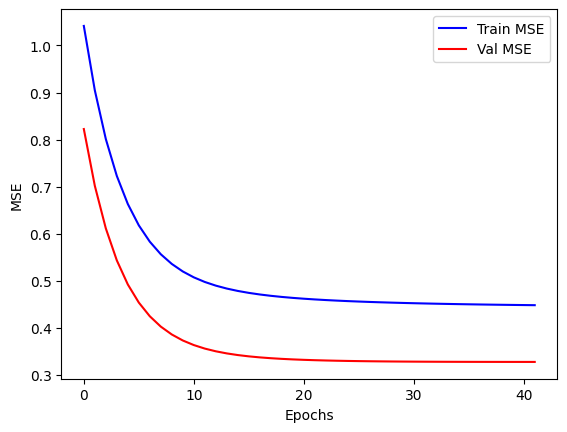

Training RMSE: 0.6694851454944377
Validation RMSE: 0.5724245297998694
Test RMSE: 0.5724245297998694


In [53]:
X_train, Y_train, X_test, Y_test = holdout(X, Y, 0.2)
weights, train_rmse, val_rmse = fit(X_train, Y_train, X_test, Y_test, 0.05, 40)
test_rmse = predict(X_test, Y_test, weights)

print(f'Training RMSE: {train_rmse}')
print(f'Validation RMSE: {val_rmse}')
print(f'Test RMSE: {test_rmse}')